In [1]:
import pandas as pd

df1 = pd.read_csv('../results/elpcoop_ablation_lambda.csv')
df1 = pd.melt(df1, id_vars=['lambda'], var_name='group', value_name='acc')
df1['shape'] = df1.group.apply(lambda x: 'start' if x == 'H' else 'point')
df1.head()

,lambda,group,acc,shape
0,0.0,Base,81.50,point
1,0.1,Base,81.97,point
2,0.3,Base,82.52,point
3,0.5,Base,83.33,point
4,0.7,Base,83.66,point


In [6]:
df2 = pd.read_csv('../results/epochs/epochs.csv')
df2.columns = ['epoch', 'method', 'Base', 'new', 'H']
df2 = pd.melt(df2, id_vars=['epoch', 'method'], var_name='group', value_name='acc')
df2.head()

,epoch,method,group,acc
0,1,CoOp w/ DePT,Base,60.47
1,1,CoOp,Base,70.06
2,2,CoOp w/ DePT,Base,76.50
3,2,CoOp,Base,73.73
4,3,CoOp w/ DePT,Base,80.64


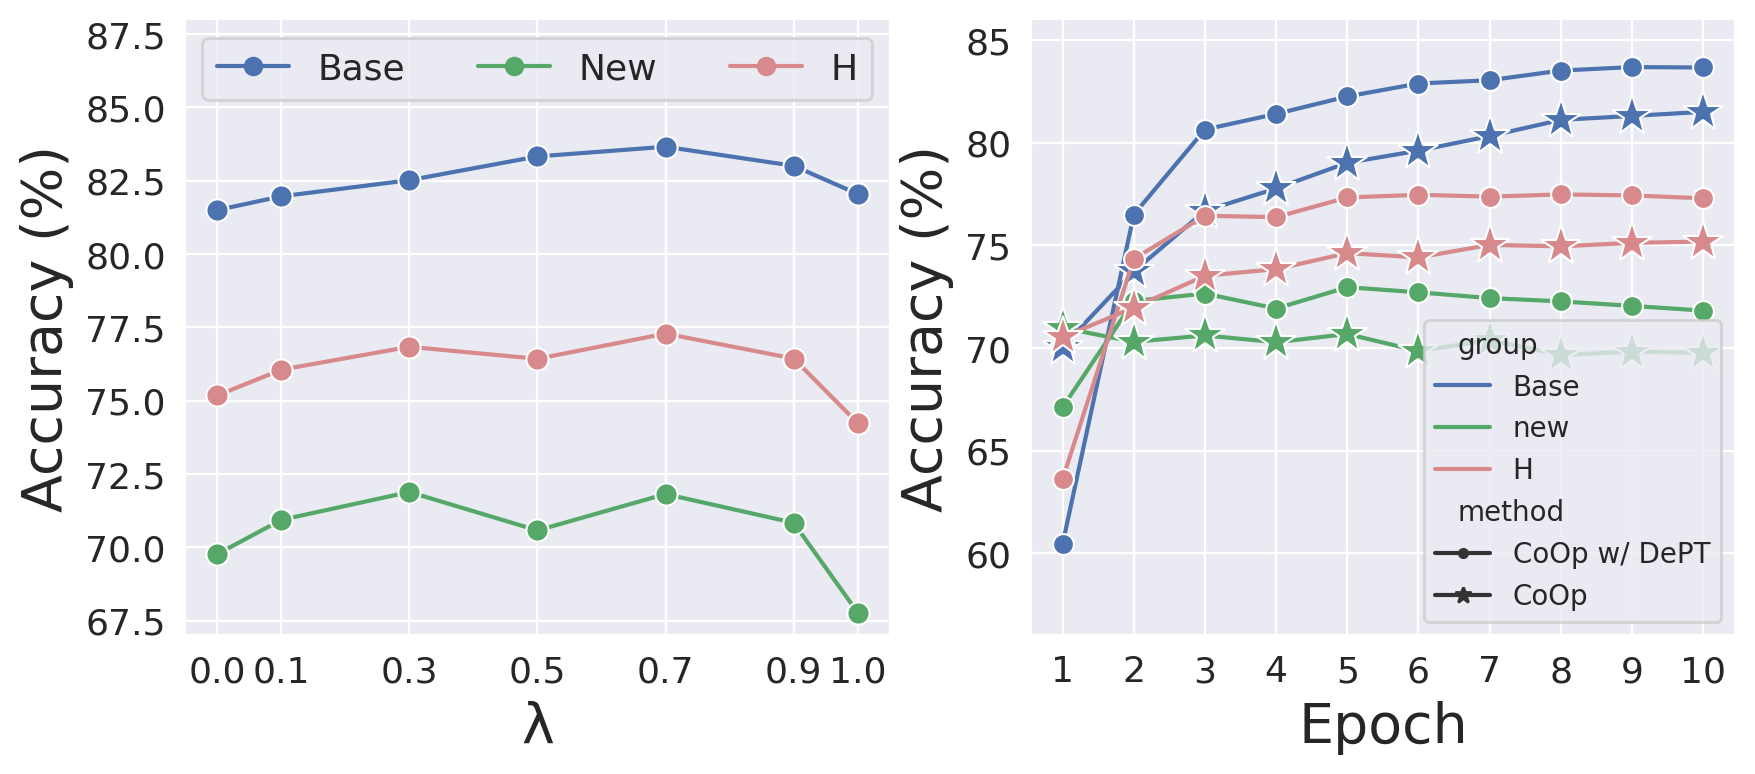

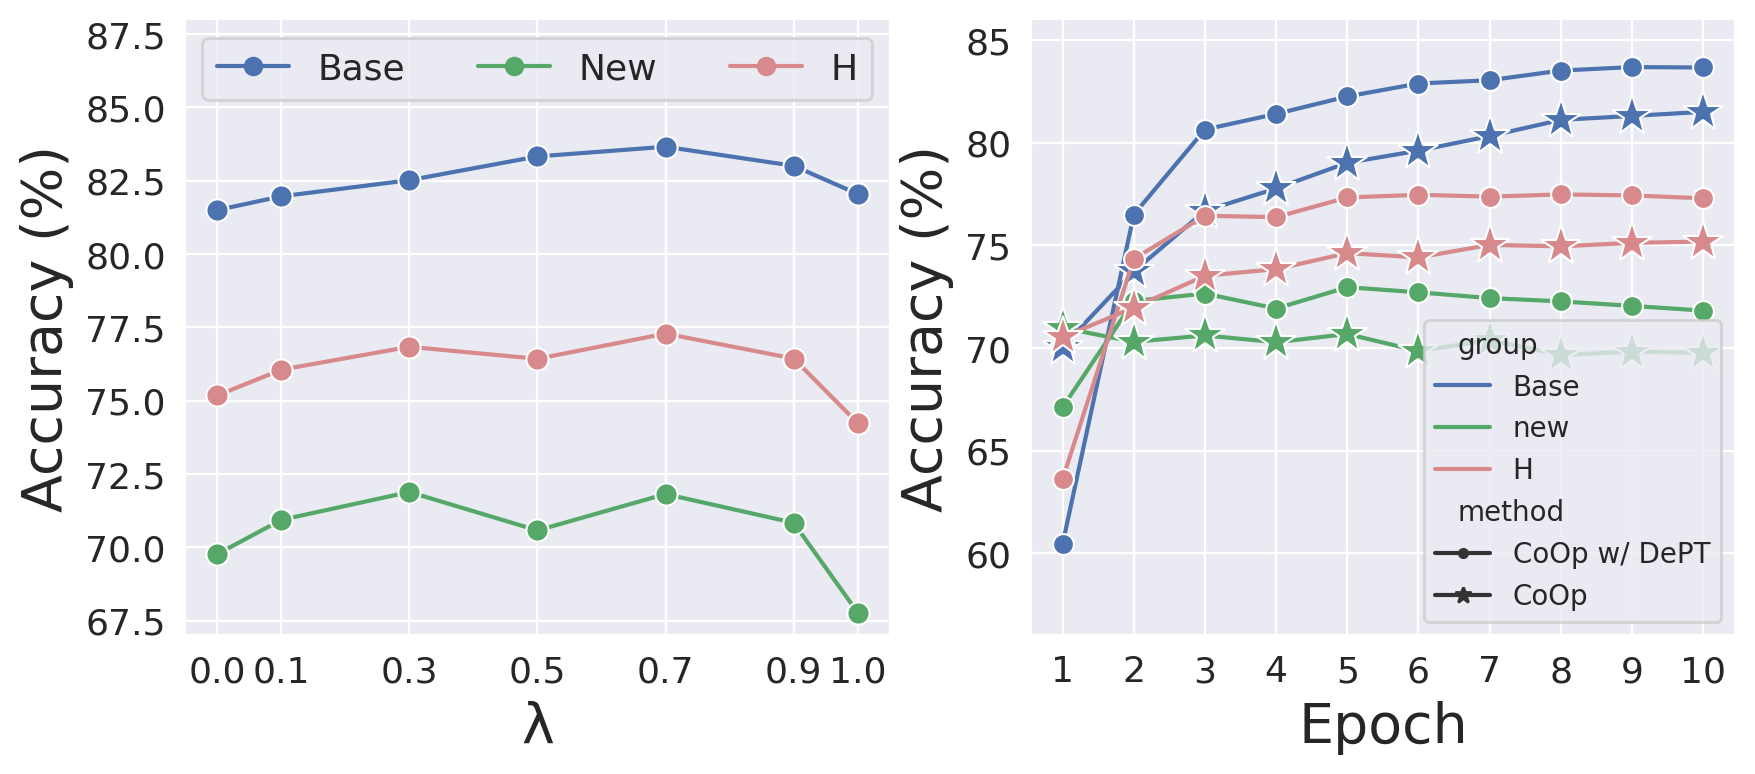

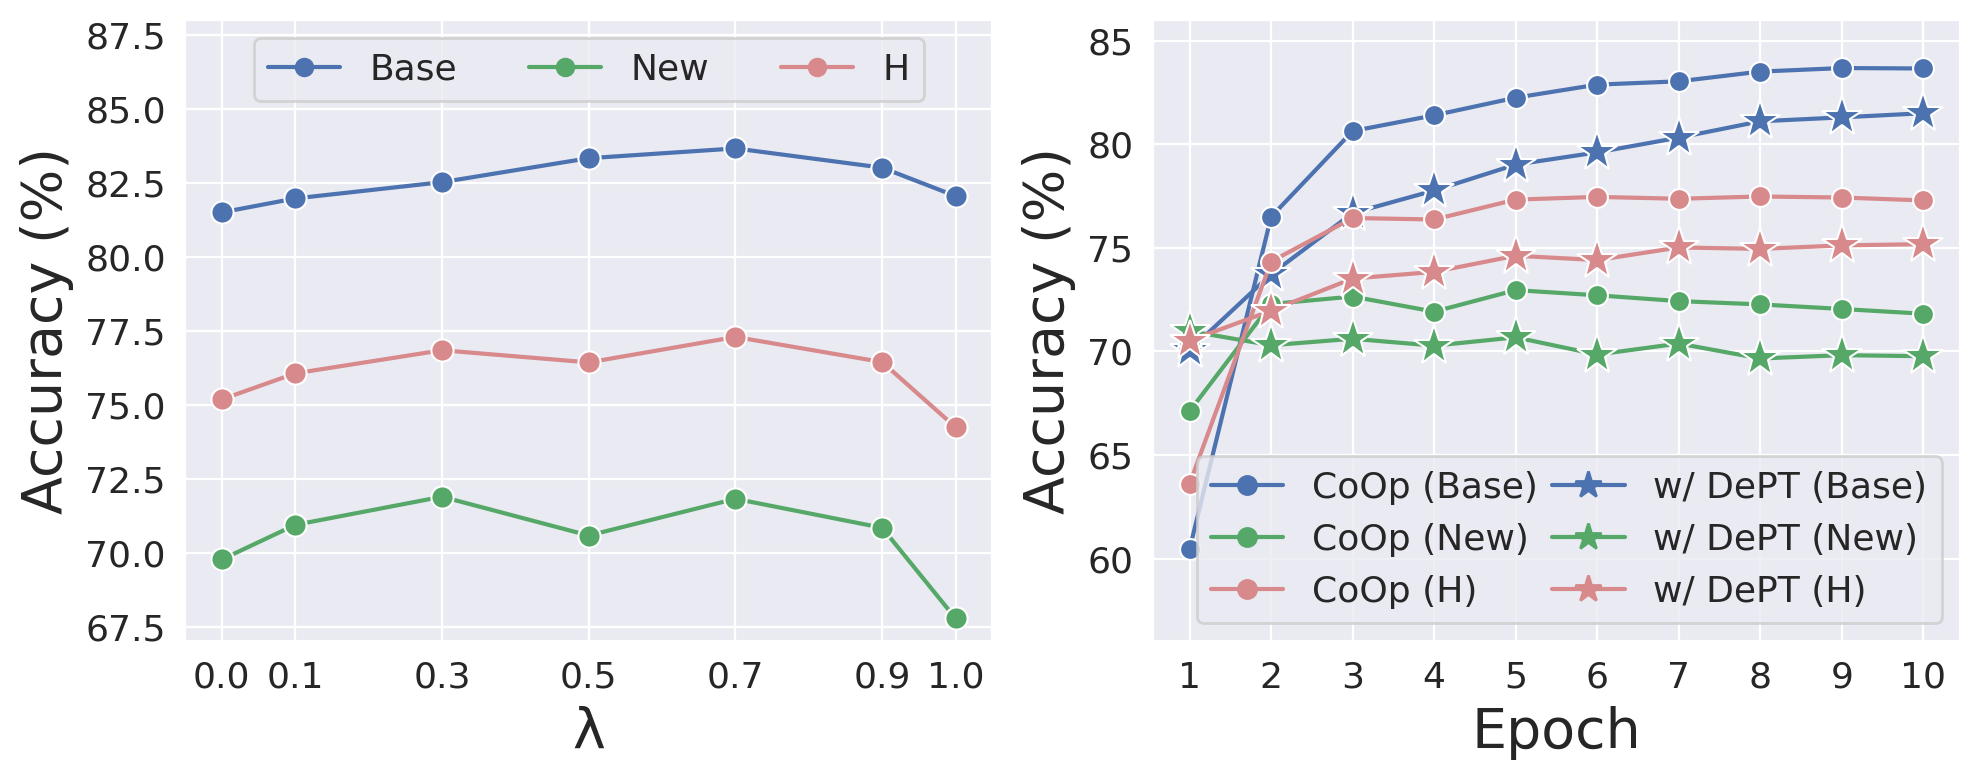

In [7]:
import copy
import matplotlib.pyplot as plt
import seaborn as sns


FIGURE_SIZE = (10, 4)
DPI = 200
FONTSIZE_TICK = 13
FONTSIZE_LABEL = 20
FONTSIZE_LEGEND = 13
Y_TITLE = -0.34
PALETTE = sns.color_palette(['#4C72B0', '#55A868', '#D7898B'])

sns.set_style('darkgrid')

plt.figure(figsize=FIGURE_SIZE, dpi=DPI)

plt.subplot(1, 2, 1)

p1 = sns.lineplot(df1, 
             x='lambda', 
             y='acc', 
             hue='group', 
             style='group',
             markers=['o', 'o', 'o'],
             markersize=8,
             dashes=False,
             palette=PALETTE,
             legend='full')

plt.xticks([0, 0.1, 0.3, 0.5, 0.7, 0.9, 1], fontsize=FONTSIZE_TICK)
plt.yticks(fontsize=FONTSIZE_TICK)
plt.ylim(67, 88)
plt.xlabel('λ', fontdict=dict(fontsize=FONTSIZE_LABEL))
plt.ylabel('Accuracy (%)', fontdict=dict(fontsize=FONTSIZE_LABEL))

# handles, labels = p1.get_legend_handles_labels()
# for handle in handles:
#     handle.set_markersize(10)
legend = plt.legend(loc='upper center', ncols=3, 
                    fontsize=FONTSIZE_LEGEND, frameon=True)
frame = legend.get_frame()
frame.set_linewidth(1)

plt.subplot(1, 2, 2)

p = sns.lineplot(df2,
                 x='epoch',
                 y='acc',
                 hue='group',
                 style='method',
                 markers=['.', '*'],
                 markersize=15,
                 palette=PALETTE,
                 dashes=False)

plt.ylim(56, 86)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], fontsize=FONTSIZE_TICK)
plt.yticks(fontsize=FONTSIZE_TICK)
plt.xlabel('Epoch', fontdict=dict(fontsize=FONTSIZE_LABEL))
plt.ylabel('Accuracy (%)', fontdict=dict(fontsize=FONTSIZE_LABEL))

handles, labels = p.get_legend_handles_labels()
handles_coop, handles_dept = copy.deepcopy(handles[1:4]), copy.deepcopy(handles[1:4])
labels_coop, labels_dept = copy.deepcopy(labels[1:4]), copy.deepcopy(labels[1:4])

for handle in handles_coop:
    handle.set_marker('.')
    handle.set_markersize(13)
for handle in handles_dept:
    handle.set_marker('*')
    handle.set_markersize(10)

labels_coop = ['CoOp (Base)', 'CoOp (New)', 'CoOp (H)']
labels_dept = ['w/ DePT (Base)', 'w/ DePT (New)', 'w/ DePT (H)']
handles = handles_coop + handles_dept
labels = labels_coop + labels_dept
legend = plt.legend(handles=handles, labels=labels, 
                    loc='lower right', ncols=2, 
                    fontsize=FONTSIZE_LEGEND, frameon=True, columnspacing=0.4,)
frame = legend.get_frame()
frame.set_linewidth(1)

plt.tight_layout()
plt.savefig('lambda_and_epoch.jpg')
plt.show()